# Introduction to Text as Data

**Author**: June Yang, CSDE and eScience Institute 

**Date**: Oct 2025

Welcome to this workshop on **Text as Data**! In this session, we'll explore key concepts from three critical areas:

- **Selection and Representation**
- **Discovery**
- **Measurement**

Each section will provide a general overview and hands-on Python examples to solidify your understanding. Note that this is a practical workshop, so we're not going deep into the theoretical details, principles, biases, and ethical considerations of working with text data. 

This does not mean, however, that we do not care about these aspects. In fact, thinking about biases and ethical issues is **crucial** when working with text data. I encourage you check out the materials listed below, for detailed discussions on topics that are not covered in detail by this workshop. 

# Table of Contents

- [Resources and Materials](#resources-and-materials)
- [Selection and Representation](#selection-and-representation)
  - [Selection and Representation Overview](#selection-and-representation-overview)
  - [How to Select and Present Text Data Using Python?](#how-to-select-and-present-text-data-using-python)
    - [Data Selection](#data-selection)
    - [Text Preprocessing](#text-preprocessing)
    - [Feature Representation](#feature-representation)
    - [Visualizing the Data](#visualizing-the-data)
- [Discovery](#discovery)
  - [Discovery Overview](#discovery-overview)
  - [Topic Modeling](#topic-modeling)
  - [How to perform LDA analysis using Python?](#how-to-perform-lda-analysis-using-python)
    - [Import Libraries](#import-libraries)
    - [Loading and Preprocessing Data](#loading-and-preprocessing-data)
    - [Vectorize the Text Data](#vectorize-the-text-data)
    - [Apply LDA](#apply-lda)
    - [Examine the Topics](#examine-the-topics)
    - [Optimal Number of Topics](#optimal-number-of-topics)
  - [Incorporating Structure into LDA](#incorporating-structure-into-lda)
- [Measurement](#measurement)
  - [Measurement Overview](#measurement-overview)
  - [How to Train a Supervised Classifier using Python?](#how-to-train-a-supervised-classifier-using-python)
    - [Import Libraries](#import-libraries-1)
    - [Data Preparation and Creating Artificial Missingness](#data-preparation-and-creating-artificial-missingness)
    - [Train-Test Split](#train-test-split)
    - [Feature Extraction with N-grams](#feature-extraction-with-n-grams)
    - [Train the Classifier](#train-the-classifier)
    - [Impute Missing Labels](#impute-missing-labels)
    - [Analyze Results](#analyze-results)
  - [How to User Generative LLMs to build a label?](#how-to-use-generative-llms-to-build-a-label)
    - [Preparing texts](#preparing-texts)
    - [Prompts](#prompts)
    - [Chains](#chains)
    - [Further thoughts on Model Selection](#further-thoughts-on-model-selection)
- [References](#references)

---

## Resources and Materials

In the age of information, text data is abundant—from social media posts and news articles to academic papers and policy documents. Understanding how to retrieve, process, and analyze this unstructured data is crucial for insights in machine learning and social sciences.

This tutorial is based on Python 3.11 and the following libraries:
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html)
- [NumPy](https://numpy.org/install/)
- [Scikit-learn](https://scikit-learn.org/stable/install.html)
- [NLTK](https://www.nltk.org/install.html)
- [LangChain](https://www.langchain.com) packages, including `langchain`, `langchain-community`, `langchain-openai`, and `langchain-text-splitters`
- [wordcloud](https://pypi.org/project/wordcloud/)
- [openai](https://github.com/openai/openai-python)
- [dotenv](https://pypi.org/project/python-dotenv/)

Specific use of the packages will be introduced below. 

This tutorial is based on the following books and resources:

- Main book this tutorial based on:
  
  <img src="https://pup-assets.imgix.net/onix/images/9780691207551.jpg" alt="Text as Data: A New Framework for Machine Learning and the Social Sciences" width="300">
- Useful guidance on NLP pipeline, including Python tutorials and Github Repo:
  
  <img src="https://learning.oreilly.com/library/cover/9781492054047/250w/" alt="Text as Data: A Practical Introduction in Python" width="300">
  
- [The Summer Institute in Computational Social Science Learning Materials](https://sicss.io/curriculum)
- Törnberg, Petter. 2024. “Best Practices for Text Annotation with Large Language Models.” Sociologica 18(2):67–85. doi:10.6092/ISSN.1971-8853/19461.


Full references and additional resources could be found in the [References](#References) at the bottom of this tutorial.

---

## Selection and Representation

### Selection and Representation Overview

The first step in the text analysis process often involves **choosing** the right text data and converting it into a **numerical** format that models can understand. Before we dive into the code, we need to start with basic principles and concepts of selecting and representing text data.

**Key Principles**
- **Principle 1**: Question-Specific Corpus Construction: The usefulness of a corpus depends on the question the researchers want to answer and the population they want to study. 
- **Principle 2**: No Values-Free Corpus Construction: There is no value-free construction of a corpus. Selecting which documents to include has ethical ramifications. 
- **Principle 3**: No Right Way to Represent Text: There is no one right way to represent text for all research questions. 
- **Principle 4**: Validation: the best assurance that a text representation is working is extensive validation. 

**Key concepts**

- **Data Selection**: Identifying and collecting relevant text data (corpora) for analysis.
- **Text Preprocessing**: Cleaning and preparing text data for analysis.
- **Feature Representation**: Converting text into numerical features that models can process.

---

### How to Select and Present Text Data Using Python?

We'll walk through an example using the `nltk`, `scikit-learn`, and `matplotlib` libraries to preprocess text data and represent it numerically.

#### Data Selection

Selecting the appropriate text data is the first step:

- **Define Objectives**: What are you trying to find out?
- **Source Data**: Collect data from reliable sources (e.g., news articles, social media).
- **Sampling**: Ensure your data is representative of the population you're studying.

What are the possible sources of bias you can think of in the process of selecting data?

In the example below, we will use the NLTK movie reviews corpus to study the sentiment of movie reviews.

##### Import Libraries

In [ ]:
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download NLTK data files (only need to run once)
#nltk.download('punkt') # tokenizer  
# nltk.download('punkt_tab')  # newer versions of NLTK separate this table
#nltk.download('stopwords') # stopwords
#nltk.download('wordnet') # lemmatizer

# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

##### Loading Data


In [2]:
# Download NLTK movie reviews corpus, only need to run once
#nltk.download('movie_reviews')

from nltk.corpus import movie_reviews

We can examine the movie_reviews corpus by using the following methods. 

In [3]:
type(movie_reviews)
# movie_reviews.fileids()
# movie_reviews.categories()
# movie_reviews.words()
# nltk.FreqDist(movie_reviews.words())
# nltk.FreqDist(movie_reviews.words())['happy']

nltk.corpus.util.LazyCorpusLoader

We then make the movie reviews data into a dataframe. 

In [4]:
# Load movie reviews data
documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

# Create a DataFrame
df = pd.DataFrame({'Review': documents, 'Label': labels})

In [5]:
# Check the number of documents
print(f"Number of documents: {len(df)}")

# Display the first few reviews
df.head()

Number of documents: 2000


,Review,Label
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


#### Text Preprocessing

Before diving into the analysis, it's essential to understand the nature of text data. As we could tell from the example, text data can be:

- **Unstructured**: Text is unstructured, making it challenging to process directly.
- **Variability**: Text can vary in length, style, and content.
- **Noise**: Text data often contains typos, slang, and irrelevant information.

Text preprocessing is crucial for cleaning and preparing your data. It usually involves the following steps:

- **Choose the unit of analysis**: We could choose the whole document as the unit of analysis, or choose sentences or paragraphs as the unit of analysis.
- **Tokenization**: Splitting text into words or phrases.
- **Reduce Complexity**:
  - Lowercase
  - Remove Punctuation
  - Remove Stop Words
  - Create Equivalences Classes (Lemmatize/Stem)
  - Filter by Frequency

##### Define Preprocessing Function

In [6]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

Additional data processing steps often involves removing duplicates, and irrelevant documents, such as advertisements that commonly mingled in the social media data.

##### Apply Preprocessing

In [7]:
df['Processed_Review'] = df['Review'].apply(preprocess_text)
df.head()

,Review,Label,Processed_Review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


In [8]:
# deduplicate Processed_Review
df = df.drop_duplicates(subset=['Processed_Review'])

#### Feature Representation

Once the text is cleaned, we need to convert it into numerical features to come up with a **document-feature matrix**. A document-feature matrix is a matrix where each row represents a different document, and each column represents a different feature we use to represent the document. This throws away a lot of information - most notably word order - but provides the researcher with a parsimonious representation of the document that is useful for many purposes.

We start from the most basic feature representation:

- **Bag-of-Words (BoW)**: Represents text as the frequency of words.

##### Bag-of-Words Representation

The most common feature representation is the bag-of-words representation. It represents text as the frequency of words. We'll use the `CountVectorizer` function from `scikit-learn` to convert the text data into the bag-of-words representation.

In [9]:
# import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We first use `CountVectorizer` to create an instance of the CountVectorizer class. Then, using `fit_transform`, we have the vectorizer learns the vocabulary from the input texts(the `fit` part). It then creates a document-feature matrix where each row represents a document, and each column represents a feature (in this case, the number of times each word appears in the document), this is the `transform` part.

The result, `X_bow`, is a sparse matrix. It's called `Bag of Words` because it disregards grammar and word order, and only looks at the frequency of each word in each document.

In [10]:
# Initialize CountVectorizer
vectorizer = CountVectorizer() # creating the instance first will allow us to use the methods associated with the class
X_bow = vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(vectorizer.get_feature_names_out())

# Display the Bag-of-Words representation
print("\nBag-of-Words Representation:")
print(X_bow.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

Bag-of-Words Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


We can also turn the bag-of-words sparse matrix into a dataframe to take a look at the representation more clearly. 

In [11]:
# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
bow_array = X_bow.toarray()

# Create a DataFrame
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# Display the first few rows and columns
print("\nBag-of-Words Representation (first 5 documents, first 10 features):")
print(bow_df.iloc[:5, :10])  

# If you want to see all features for a specific document:
doc_index = 0  
print(f"\nAll features for document {doc_index}:")
print(bow_df.iloc[doc_index].loc[bow_df.iloc[doc_index] != 0].sort_values(ascending=False))


Bag-of-Words Representation (first 5 documents, first 10 features):
   aa  aaa  aaaaaaaaah  aaaaaaaahhhh  aaaaaah  aaaahhhs  aahs  aaliyah  \
0   0    0           0             0        0         0     0        0   
1   0    0           0             0        0         0     0        0   
2   0    0           0             0        0         0     0        0   
3   0    0           0             0        0         0     0        0   
4   0    0           0             0        0         0     0        0   

   aalyah  aamir  
0       0      0  
1       0      0  
2       0      0  
3       0      0  
4       0      0  

All features for document 0:
film          8
movie         7
make          6
pretty        5
teen          4
             ..
generation    1
genre         1
girlfriend    1
give          1
year          1
Name: 0, Length: 236, dtype: int64


In [12]:
# Display the 20 most frequent words
word_freq = bow_df.sum().sort_values(ascending=False)
print("\n20 Most Frequent Words:")
print(word_freq.head(20))


20 Most Frequent Words:
film         10951
movie         6858
one           5753
character     3851
like          3638
time          2845
get           2784
scene         2641
make          2579
even          2553
good          2328
story         2318
would         2259
much          2022
also          1964
see           1863
way           1853
two           1827
life          1808
first         1768
dtype: int64


Building off from the Bag of Words representation, there are two fundamental types of models we could consider: *probablistic* and *algorithmic*. 

In probablistic models, we make assumptions about the data generation process using probability. This data generation process is based on an unkown set of parameters. Our job is to estimate these parameters using the data we actually observe. Understanding probabilistic models forms the foundation of the probablistic clustering, admixture, and classification models. 

In algorithmic approaches, instead of making assumptions about the data generation process, we start by specifying a series of steps, usually in the form of an objective function to optimize. In the context of text representation, we can use the *vector space model* to represent documents as vectors in a high-dimensional space, where each dimension corresponds to a feature. This will allow us to use measures of similarity and distances drawn from linear algebra to compare documents. 

In essence, both approaches can be thought of as using different languages to describe the same thing. Consider, for example, describing linear regression from a probabilistic perspective (a normal linear model) vs. an algorithmic perspective (least squares estimation). 

In this tutorial, we will focus on a common approach to reweight the terms when constructing the vector space:
- **Term Frequency-Inverse Document Frequency (TF-IDF)**: Weighs words based on their importance.

##### TF-IDF Representation

High frequent words are essentially the glue that holds language together, and they offer few clues about what the text as about. Rare words on the other hand might contain a lot more useful information, but they are not frequent enough to be useful for making generalizations about the text. The key is the words in the middle. 

Term Frequency Inverse Document Frequency (TF-IDF) is a measure that reflects how important a word is to a document in a corpus. After computing the document-feature matrix, tf-idf scales each term bount by a measure of its inverse frequency within the whole corpus. This has the effect of down-weighting frequent words. The most common form of tf-idf takes the form of 

$$\text{TF-IDF}(t,d,D) = \text{TF}(t,d) \cdot \text{IDF}(t,D)$$

Where:

$$\text{TF}(t,d) = \frac{n_{t,d}}{N_d}$$

$$\text{IDF}(t,D) = \log\left(\frac{N}{\text{df}_t}\right)$$

Therefore:

$$\text{TF-IDF}(t,d,D) = \frac{n_{t,d}}{N_d} \cdot \log\left(\frac{N}{\text{df}_t}\right)$$

Where:
- $n_{t,d}$ is the number of occurrences of term t in document d
- $N_d$ is the total number of terms in document d
- $N$ is the total number of documents in the corpus D
- $\text{df}_t$ is the number of documents containing term t


In [13]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Processed_Review'])

# Display feature names
print("Feature Names:")
print(tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print("\nTF-IDF Representation:")
print(X_tfidf.toarray())

Feature Names:
['aa' 'aaa' 'aaaaaaaaah' ... 'zwick' 'zwigoff' 'zycie']

TF-IDF Representation:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.03579222 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [14]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense array
tfidf_array = X_tfidf.toarray()

# Create a DataFrame
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

# Calculate the mean TF-IDF score for each word across all documents
mean_tfidf = tfidf_df.mean()

# Sort words by their mean TF-IDF score in descending order
top_words = mean_tfidf.sort_values(ascending=False)

In [15]:
# Display the top 20 words
print("\nTop 20 words by mean TF-IDF score:")
print(top_words.head(20))

# Visualize the top 50 words
#plt.figure(figsize=(15, 8))
#top_words.head(50).plot(kind='bar')
#plt.title('Top 50 Words by Mean TF-IDF Score')
#plt.xlabel('Words')
#plt.ylabel('Mean TF-IDF Score')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()


Top 20 words by mean TF-IDF score:
film         0.055481
movie        0.040727
one          0.029930
character    0.023451
like         0.021930
get          0.018693
time         0.018333
scene        0.018172
story        0.017269
good         0.017114
even         0.017016
make         0.016934
would        0.016182
much         0.014899
life         0.014756
also         0.014564
see          0.014427
two          0.014018
well         0.013780
thing        0.013640
dtype: float64


What are some words that rank high in terms of TF-IDF score but not in terms of frequency?

In [16]:
# find words that rank high in terms of TF-IDF score but not in terms of frequency
# Calculate word frequencies
#word_freq = df['Processed_Review'].str.split(expand=True).stack().value_counts()

# Normalize word frequencies
word_freq_normalized = word_freq / word_freq.sum()

# Calculate the rank difference between TF-IDF and frequency
rank_diff = pd.DataFrame({
    'tfidf_rank': top_words.rank(ascending=False),
    'freq_rank': word_freq_normalized.rank(ascending=False)
})
rank_diff['rank_difference'] = rank_diff['freq_rank'] - rank_diff['tfidf_rank']

# Sort by rank difference to find words with high TF-IDF rank but low frequency rank
interesting_words = rank_diff.sort_values('rank_difference', ascending=False)

print("Top 50 words with high TF-IDF score but low frequency:")
print(interesting_words.head(50))


Top 50 words with high TF-IDF score but low frequency:
               tfidf_rank  freq_rank  rank_difference
wincer            15535.5    27823.0          12287.5
youre             15535.5    27823.0          12287.5
kolya             15664.5    27823.0          12158.5
zdenek            15664.5    27823.0          12158.5
kale              15767.0    27823.0          12056.0
watchabe          15780.5    27823.0          12042.5
sooo              15780.5    27823.0          12042.5
extremly          16208.5    27823.0          11614.5
fledged           16208.5    27823.0          11614.5
pallbearer        16240.0    27823.0          11583.0
mace              16346.0    27823.0          11477.0
fruitition        16534.0    27823.0          11289.0
snoozing          16577.0    27823.0          11246.0
manhatten         16577.0    27823.0          11246.0
cairo             16577.0    27823.0          11246.0
outshining        16586.5    27823.0          11236.5
conning           16586.5  

#### Visualizing the Data

Let's visualize the most important words in the corpus.

##### Word Cloud

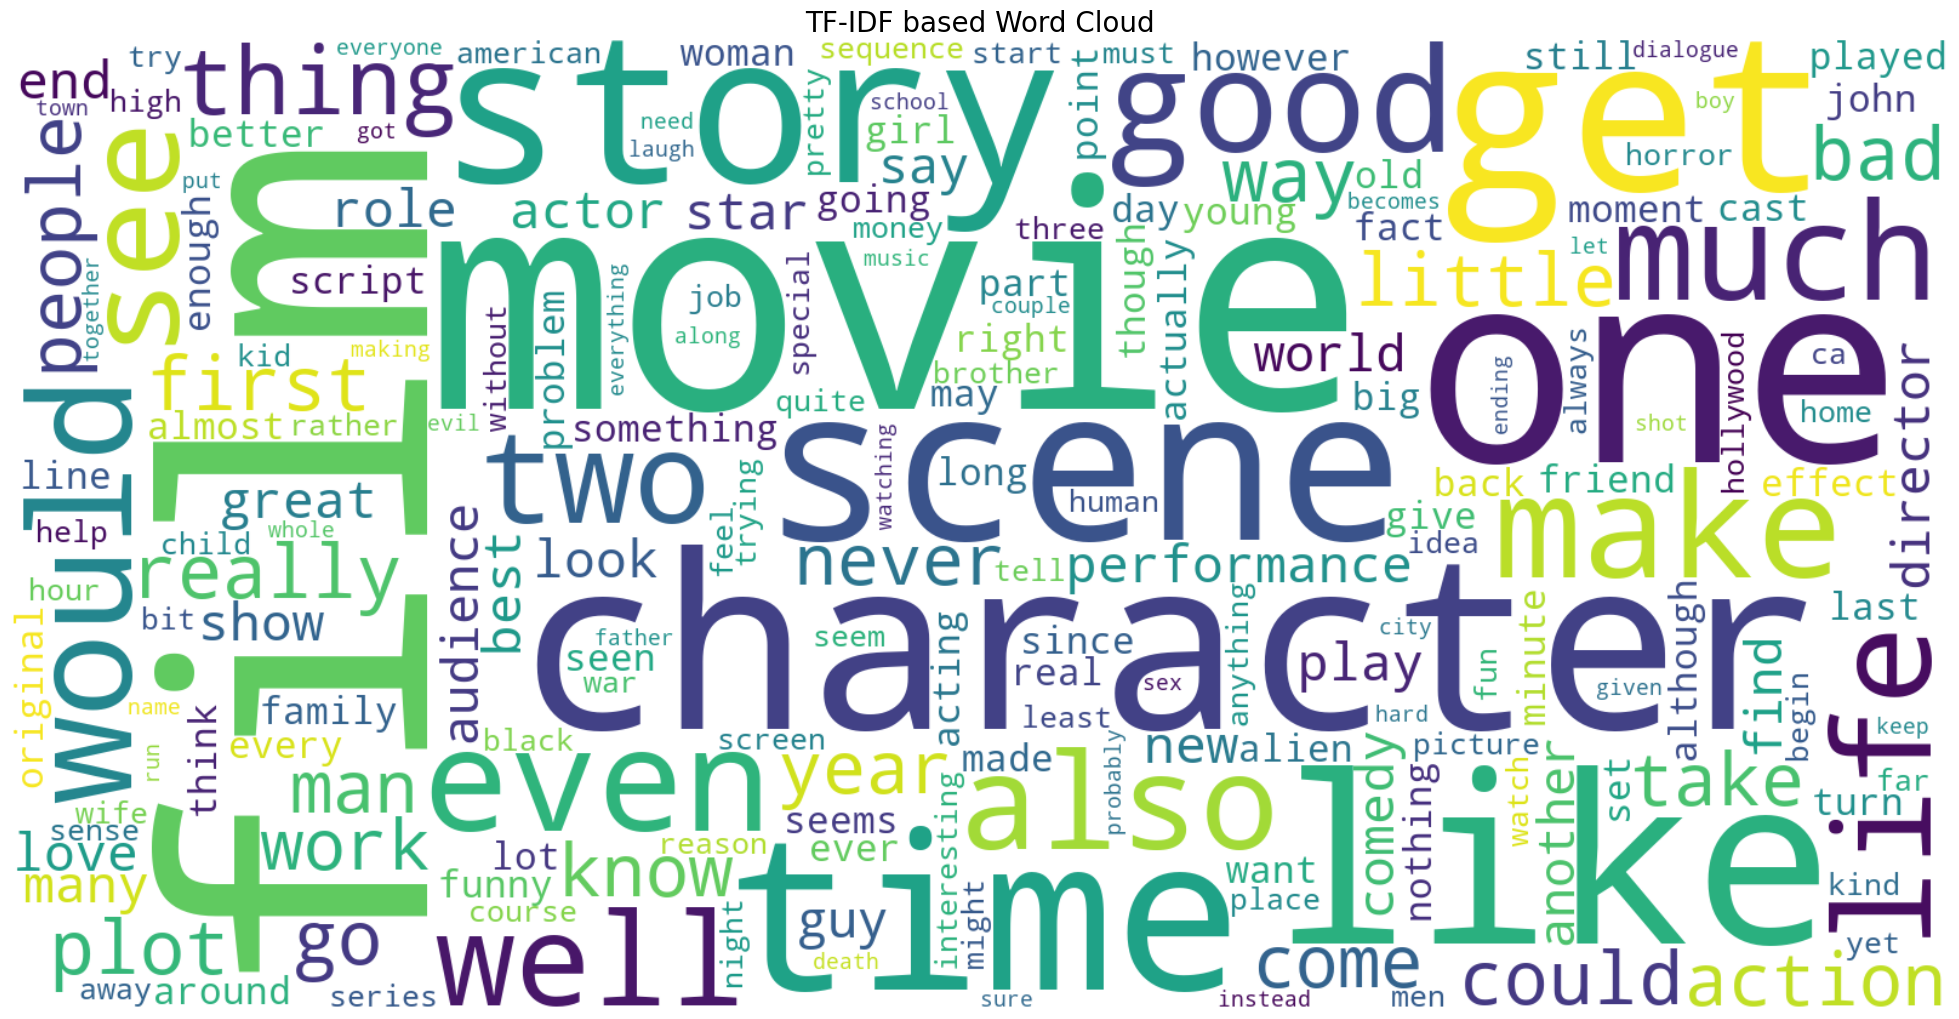

In [17]:
from wordcloud import WordCloud

# Use the existing TF-IDF data
tfidf_dict = top_words.to_dict()

# Generate TF-IDF based word cloud
tfidf_wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(tfidf_dict)

# Create the plot
plt.figure(figsize=(20, 10))
plt.imshow(tfidf_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('TF-IDF based Word Cloud', fontsize=20)
plt.tight_layout(pad=0)
plt.show()

For more complex feature representation methods that are able to provide a measure of meaning, based on the *distrubutional hypothesis* that the context in which words are used provides a clue to the meaning, we can use **Word Embeddings** which represents words in continuous vector space (e.g., Word2Vec, GloVe). Check out the GRS book for more details!

---

## Discovery

### Discovery Overview

When analyzing text data, we often have to reconsider the standard deductive approach social scientists have been trained to develop and test theories/claims. In fact, social scientists have acknowledged the importance of more inductive reasoning in the research process. With text data especially, a great deal of learning can happen *while* analyzing the data. 

<figure>
  <img src="https://github.com/jyang32/TAD_workshop/raw/main/plot/inductive_model.png" alt="Deductive versus Inductive Models" width="500"/>
  <figcaption>
    <small>Source: Grimmer, J., Roberts, M. E., & Stewart, B. M. (2022). Text as data: A new framework for machine learning and the social sciences. Princeton University Press. Page 15.</small>
  </figcaption>
</figure>

At the early stage of the research process, analysts are focused on *discovery*. The primary goal of discovery is to develop the research question. Discovery ofen involves using both supervised and unsupervised learning techniques to group texts into structures, patterns, or themes. 

*What is the different between supervised and unsupervised methods?*

Before we dive into the methods, let's briefly review the principles of discovery.

- **Principle 1**: Context Relevance: Text as data models complement theory and substantive knowledge. Contextual knowledge amplifies our ability to make compuational discoveries. 
- **Principle 2**: No Ground Truth: There is no ground truth conceptualization; only after a context is fixed can we talk meaingfully about it being right or wrong. 
- **Principle 3**: Judge the Concept, not the Method: Only the utility of a concept matters when you assess the concept's value. 
- **Principle 4**: Separate Data is Best: Ideally, after data is used for discovery, it should be discarded in favor of new data for confirming/testing discoveries. 

Key Classes of Methods:

- **Discriminating Words**: Identifying words that are used disproportionally by a given group of documents.
- **Clustering**: producing a *partition* of the texts.
- **Topic Models**: discovering a set of *K* categories where documents hold proportional membership in all categories.
- **Low-Dimensional Document Embeddings**: locating documents in a real-valued space of lower dimensionality.

---
In this tutorial, we will focus on the method of Topic Modeling and the extensions of this method. 

###  Topic Modeling

Topic models suppose that each document in the corpus is a mixture of a fixed number of underlying topics, and each topic is a mixture of words. 

The goal of topic modeling is to identify the topics and their associated probabilities for each document, as well as the words and their associated probabilities for each topic.

In this tutorial, we'll use the canonical Latent Dirichlet Allocation (LDA) for topic modeling. 

LDA is a Bayesian hierarchical model that assumes a particular data generation process for how an author produces a text. We first suppose that when writing a text, the author draws a mixure of topics: a set of weights that will describe how prevalent the particular topics are. Given that set of weights, the author generates the actual text. For each word the author first draws the word's topic. Then, conditional on the topic, the actual word is drawn from a topic-specific distribution. This topic-specific distribution is common across the documents and characterizes the rates at which words appear when discussing a particular topic. Mathematically, we can describe the process as follows:

#### Latent Dirichlet Allocation (LDA) Model

As a generative probabilistic model for collections of discrete data such as text corpora, the LDA model assumes the following generative process for each document $d$ in a corpus $D$:

1.	For each topic $k = 1, \dots, K$:
$$\phi_k \sim \text{Dir}(\eta)$$
where $\phi_k$ is the distribution of words for topic k.

2.	For each document $d = 1, \dots, M$:
$$\theta_d \sim \text{Dir}(\alpha)$$
where $\theta_d$ is the distribution of topics for document d.

3.	For each word $w_{d,n}$ in document d:
$$
\begin{aligned}
z_{d,n} &\sim \text{Multinomial}(\theta_d) \
w_{d,n} &\sim \text{Multinomial}(\phi_{z_{d,n}})
\end{aligned}
$$

##### Parameters:

- $K$: Number of topics
- $V$: Vocabulary size
- $M$: Number of documents
- $N_d$: Number of words in document $d$
- $\alpha$: Dirichlet prior on the per-document topic distributions
- $\eta$: Dirichlet prior on the per-topic word distribution

##### Distributions:

1.	Distribution of topics in document $d$:
$$P(\theta_d \mid \alpha) = \text{Dir}(\theta_d \mid \alpha)$$
2.	Distribution of words in topic $k$:
$$P(\phi_k \mid \eta) = \text{Dir}(\phi_k \mid \eta)$$
3.	Topic assignment for word $n$ in document $d$:
$$P(z_{d,n} \mid \theta_d) = \text{Multinomial}(z_{d,n} \mid \theta_d)$$
4.	Observed word n in document $d$:
$$P(w_{d,n} \mid z_{d,n}, \phi) = \text{Multinomial}(w_{d,n} \mid \phi_{z_{d,n}})$$

##### Joint Distribution:

The joint distribution of all random variables is:

$$
P(\phi, \theta, z, w \mid \alpha, \eta)
= \left[\prod_{k=1}^{K} P(\phi_k \mid \eta)\right]
\left[\prod_{d=1}^{M} P(\theta_d \mid \alpha)
\prod_{n=1}^{N_d} P(z_{d,n} \mid \theta_d)
P(w_{d,n} \mid z_{d,n}, \phi)\right]
$$

##### Inference:

The goal is to compute the posterior distribution:

$$
P(\phi, \theta, z \mid w, \alpha, \eta)
= \frac{P(\phi, \theta, z, w \mid \alpha, \eta)}{P(w \mid \alpha, \eta)}
$$

This is typically approximated using methods like Variational Inference or Gibbs Sampling.

---

### How to perform LDA analysis using Python?

We'll perform LDA analysis mainly using the `sklearn` library.

#### Import Libraries

In [18]:
# Scikit-learn libraries
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score

#### Loading and Preprocessing Data

We'll use the preprocessed data from the previous section.

In [19]:
# movie_reviews data from the previous section
df.head()

,Review,Label,Processed_Review
0,"plot : two teen couples go to a church party ,...",neg,plot two teen couple go church party drink dri...
1,the happy bastard's quick movie review \ndamn ...,neg,happy bastard quick movie review damn bug got ...
2,it is movies like these that make a jaded movi...,neg,movie like make jaded movie viewer thankful in...
3,""" quest for camelot "" is warner bros . ' firs...",neg,quest camelot warner bros first attempt steal ...
4,synopsis : a mentally unstable man undergoing ...,neg,synopsis mentally unstable man undergoing psyc...


#### Vectorize the Text Data

LDA does not work with raw text. Just as we learned in the previous section, we need to convert the text data into a numerical feature matrix. Here, we will use the TF-IDF method. `Scikit-learn`'s `TfidfVectorizer` provides a convenient way for us to not only convert single words, but also generate n-grams and calculate the TF-IDF scores.

**N-grams** are continuous sequences of words or tokens. For example:

- **Unigrams (n=1)**: A single word (e.g., "movie");
- **Bigrams (n=2)**: A sequence of two words (e.g., "great movie");
- **Trigrams (n=3)**: A sequence of three words (e.g., "really great movie");

Using a range of n-grams (from 1 to 5 in the below code) helps us capture not only individual words, but also common phrases and expressions in the text.  

In [20]:
# Import TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer with n-grams from 1 to 5
# max_df: ignore terms that appear in more than 95% of the documents
# min_df: ignore terms that appear in less than 2 documents
# stop_words: ignore common English stop words
# ngram_range: consider n-grams from 1 to 5
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(1, 5))

# Fit and transform the 'Processed_Review' column
X = vectorizer.fit_transform(df['Processed_Review'])

# Check the shape of the resulting document-term matrix
print(f"Shape of the document-term matrix: {X.shape}")

Shape of the document-term matrix: (1998, 83944)


#### Apply LDA

In [21]:
# Set the number of topics
n_topics = 5

# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit the LDA model to the TF-IDF matrix
lda_model.fit(X)

,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


#### Examine the Topics

Now let's display the top n-grams for each topic. 

In [22]:
# Get the n-grams (words and phrases) that make up the vocabulary
ngrams = vectorizer.get_feature_names_out()

# Function to display the top n-grams for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Display the top 10 n-grams for each topic
n_top_words = 10
display_topics(lda_model, ngrams, n_top_words)


Topic 1:
lumumba, maximus, osmosis, osmosis jones, potent stuff, good bring friend amazing, potent stuff perfection, bring friend amazing potent, better staying, stuff perfection twice

Topic 2:
film, movie, character, like, scene, time, story, make, good, life

Topic 3:
col, col nicholson, event horizon, horizon, bridge river kwai, bridge river, river kwai, kwai, shear, horrifying story

Topic 4:
bischoff, sinclair, eric bischoff, gordie, mulder, wcw, wrestling fan, world wrestling federation, wrestling federation, world wrestling

Topic 5:
know react, jordan winning nba championship thought, react know react michael jordan, thought meeting, winning nba championship, know react know, like chase long know, long know, react know react michael, know react know react michael


For each topic, we can also sort the documents by their probabilities of belonging to the topic, and then select the top documents that have the highest probabilities of belonging to the topic. 

In [23]:
# Get the topic distribution for each document
doc_topic_distributions = lda_model.transform(X)

# Show the shape of the topic distribution matrix (documents x topics)
print(doc_topic_distributions.shape)

# Each row corresponds to a document, and each column corresponds to a topic.
# For example, doc_topic_distributions[0] gives the topic distribution for the first document.

(1998, 5)


In [24]:
# Set a threshold for topic contribution
threshold = 0.1

# Step 2: For each topic, find the top documents
n_top_docs = 2  # Number of top documents per topic
for topic_idx in range(n_topics):
    print(f"\nTopic {topic_idx + 1}:")
    
    # Find the documents where the contribution to this topic is greater than the threshold
    significant_docs = np.where(doc_topic_distributions[:, topic_idx] > threshold)[0]
    
    if len(significant_docs) == 0:
        print("No documents were assigned to this topic.")
        continue

    # Sort the documents by their topic contribution
    topic_contributions = doc_topic_distributions[significant_docs, topic_idx]
    
    # Use np.unique to ensure that the top documents are unique
    unique_top_doc_indices = np.unique(significant_docs[np.argsort(topic_contributions)[::-1][:n_top_docs]])
    
    # Display the top documents for this topic, ensuring no duplicates
    for doc_idx in unique_top_doc_indices:
        print(f"Document {doc_idx}: (Topic {topic_idx + 1} weight: {doc_topic_distributions[doc_idx, topic_idx]:.4f})")
        print(df['Processed_Review'].iloc[doc_idx][:500])  # Show the first 500 characters of the review
        print("-" * 80)


Topic 1:
Document 720: (Topic 1 weight: 0.2699)
premise movie well pretty tom berenger play shale mercenary temporarily work fool cia denied existence buddy botched job cuba fortunately girl friend diane venora teacher christopher columbus high school miami get knee cap broken disgruntled student creating job opening shale substitute teacher telling girl friend might object pedagogical ground creates number fake higher degree yale harvard princeton et al begin tenure high school teacher student junky drug dealer gang member sleazy slut wielde
--------------------------------------------------------------------------------
Document 1378: (Topic 1 weight: 0.3633)
ok admit bad attitude film start romantic comedy trial tribulation single working parent couple incredibly cute kid thrown good measure yuck really bad lot working least addition typical lot recent movie really glorified movie longer bigger star pay see win though even painfully predictable think two single parent cute kid thro

In [25]:
# Examine documents 1174 and 1759 in df
print("Document 1113:")
print(df['Processed_Review'].iloc[1113])
print("\nOriginal Review:")
print(df['Review'].iloc[1113])
print("\n" + "-"*80 + "\n")

print("Document 1272:")
print(df['Processed_Review'].iloc[1272])
print("\nOriginal Review:")
print(df['Review'].iloc[1272])


Document 1113:
know funnest word fun noun therefore conjugated like adjective word came right viewing chicken run wonder kind movie reduces childish expression like funnest movie ever seen hell webster chicken run one funnest movie seen ca remember last time seen anything funner chicken tweedy farm something living concentration atmosphere led one plucky hen called ginger voice julia sawalha continually come plan escape always get caught subsequently spending day day coal box one night brash american rooster fly fence calling rocky mel gibson famous flying rooster circus performer rocky promise teach chicken fly situation grows desperate nefarious mr tweedy miranda richardson decides abandon farm plan plan order huge machine cackling chicken go pie come sort pie chicken pie course nick park studio aardman animation produced three short film creature comfort wrong trouser close shave latter two second third installment trilogy starring delightful team wallace gromit man dog famous getti

#### Optimal Number of Topics

Choosing the optimal number of topics is one of the key challenges in topic modeling. We can use the following methods to choose the optimal number of topics:

- **Perplexity**: A measure of how well the model predicts the held-out data. Lower perplexity indicates a better fit.
- **Coherence Score**: A measure of the semantic similarity between the top words in the topics. Higher coherence scores indicate better topic quality.
- **Manual Interpretation**: Sometimes manual inspection of topics and their interpretability is necessary. If topics are too similar or too granular, you may want to adjust the number of topics.
- **Grid Search/Cross Validation**: Usea range of topic numbers and evaluate using the above metrics to find the most appropriate number. 

While **perplexity** can give us a quantitative measure of how well the model fits the data, it doesn't always correlate with how meaningful the topics are to humans. That's why **coherence** is often preferred for assessing topic models. In Python, we can use the `gensim` library's `CoherenceModel` to calculate the coherence score for different number of topics, and then chooses the one with the highest coherence score. 

### Incorporating Structure into LDA

- Structure with upstream covariates, e.g. Structural Topic Models (STM)
- Structure with downstream covariates, e.g. Supervised Latent Dirichlet Allocation (sLDA)

Probablistic topic models such as LDA and STM are readily implemented by R packages. 

---

## Measurement

### Measurement Overview

**Measurement** involves quantifying specific attributes or behaviors within text data. The beauty of text as data is that we can create custom measurements for a wide range of phenomena that are often difficult to quantify based on other data types. Before we dive into the specifics, let's review the key principles and classes of methods that can be used for measurement building. 

Key principles: *What makes a good measurement?*

- **Principle 1**: Measures should have clear goals
- **Principle 2**: Source material should always be identified and ideally made public
- **Principle 3**: The coding process should be explainable and reproducible
- **Principle 4**: The measure should be validated
- **Principle 5**: Limitations should be explored, documentd and communicated to the audience

Key varieties of approaches:

- **Word Counting** (keyword- or dictionary-based methods)
- **Supervised Classification**
- **Generative Large Language Models**

**Common questions we ask: how to decide on a method?**

With qualitative methods, we can create custom measurements of text data by coding the text data ourselves. This process can be time and resource-consuming, but it allows for the creation of highly specific and tailored measures. Coding qualitatively often creates "ground truth" that can be used to validate more automated approaches. 

Supervised classification uses a set of documents labeled into categories to create a statistical model, also referred to as a classifier that relates the words in the documents to the labels. A properly trained classifier can be used to classify new, unseen text data. 

---
### How to Train a Supervised Classifier using Python?
In the example below, we'll use the same data from the previous section, and the `scikit-learn` library to train a logistic regression classifier for movie review sentiment analysis. 

#### Import Libraries

In [26]:
# Training a Classifier for Movie Review Sentiment Analysis with Imputation

#import pandas as pd
#import numpy as np
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
#import matplotlib.pyplot as plt

#### Data Preparation and Creating Artificial Missingness

In this step, we'll prepare the data and create some artificial missingness for us to predict the missing labels, as an illustration of the process.

In [ ]:
# Review Our DataFrame with 'Processed_Review' and 'Label' columns
print(f"Original dataset shape: {df.shape}")

# Create a binary label column
df['Label_Binary'] = df['Label'].map({'pos': 1, 'neg': 0})

# Introduce random missingness (20% of the data)
np.random.seed(42)
miss_mask = np.random.rand(len(df)) < 0.2
df.loc[miss_mask, 'Label_Binary'] = np.nan

print(f"Number of reviews with missing labels: {sum(df['Label_Binary'].isna())}")  

Original dataset shape: (1998, 3)
Number of reviews with missing labels: 427


#### Train-Test Split

In this step, we'll split the data into training and testing sets. Training set will be used to train the model, and testing set will be used to evaluate the model. It is important to have a separate testing set to evaluate the performance of the model on unseen data.

In the case of supervised classification, it is recommended to separate the labeled dataset into training, validation, and testing sets. The validation set is used to fine-tune the model's hyperparameters, and the testing set is used to evaluate the final performance of the model. In this example, we did not include the validation set for simplicity of illustration.

In [28]:
# Separate labeled and unlabeled data
labeled_mask = ~df['Label_Binary'].isna()
X_labeled = df.loc[labeled_mask, 'Processed_Review']
y_labeled = df.loc[labeled_mask, 'Label_Binary']
X_unlabeled = df.loc[~labeled_mask, 'Processed_Review']

X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Unlabeled set shape: {X_unlabeled.shape}")

Training set shape: (1256,)
Testing set shape: (315,)
Unlabeled set shape: (427,)


#### Feature Extraction with N-grams

In [29]:
## Step 3: Feature Extraction with N-grams

print("\nStep 3: Feature Extraction with N-grams")

# Initialize and fit the TF-IDF vectorizer on training data only
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, max_df=0.9, min_df=5)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_unlabeled_tfidf = tfidf_vectorizer.transform(X_unlabeled)

print(f"Shape of training feature matrix: {X_train_tfidf.shape}")
print(f"Shape of testing feature matrix: {X_test_tfidf.shape}")
print(f"Shape of unlabeled feature matrix: {X_unlabeled_tfidf.shape}")

# Display some of the n-gram features
feature_names = tfidf_vectorizer.get_feature_names_out()
print("\nSample n-gram features:")
print(feature_names[:10])  # First 10 features
print(feature_names[-10:])  # Last 10 features



Step 3: Feature Extraction with N-grams
Shape of training feature matrix: (1256, 1000)
Shape of testing feature matrix: (315, 1000)
Shape of unlabeled feature matrix: (427, 1000)

Sample n-gram features:
['ability' 'able' 'absolutely' 'accent' 'across' 'act' 'acting' 'action'
 'action film' 'actor']
['writer' 'writing' 'written' 'wrong' 'wrote' 'year' 'yes' 'yet' 'york'
 'young']


#### Train the Classifier

In [30]:
# Initialize and train the classifier
classifier = LogisticRegression(random_state=24, max_iter=1000)
classifier.fit(X_train_tfidf, y_train)

# Evaluate on the test set
y_pred = classifier.predict(X_test_tfidf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.76      0.80       155
    Positive       0.79      0.86      0.82       160

    accuracy                           0.81       315
   macro avg       0.82      0.81      0.81       315
weighted avg       0.82      0.81      0.81       315



In [31]:
# Display top features
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance (log-odds)': classifier.coef_[0]
})
print("\nTop 10 positive features:")
print(feature_importance.sort_values('importance (log-odds)', ascending=False).head(10))
print("\nTop 10 negative features:")
print(feature_importance.sort_values('importance (log-odds)', ascending=True).head(10))


Top 10 positive features:
         feature  importance (log-odds)
495         life               1.999043
958         well               1.620548
950          war               1.564506
632  performance               1.395503
27          also               1.345332
378        great               1.316900
289    excellent               1.299956
526         many               1.287501
630      perfect               1.271196
442       jackie               1.269236

Top 10 negative features:
           feature  importance (log-odds)
66             bad              -3.352662
987          worst              -2.304800
651           plot              -1.592103
278           even              -1.589788
836         stupid              -1.569152
594        nothing              -1.515243
62           awful              -1.416415
101         boring              -1.411402
846       supposed              -1.379331
923  unfortunately              -1.373227


#### Impute Missing Labels

In [32]:
# Predict labels for unlabeled data
imputed_labels = classifier.predict(X_unlabeled_tfidf)

# Add imputed labels to the dataframe
df.loc[~labeled_mask, 'Imputed_Label'] = imputed_labels
df['Final_Label'] = df['Label_Binary'].fillna(df['Imputed_Label'])

print("Sample of imputed labels:")
print(df[~labeled_mask][['Processed_Review', 'Imputed_Label']].head())

print(f"\nFinal dataset shape: {df.shape}")
print(f"Number of positive reviews: {sum(df['Final_Label'] == 1)}")
print(f"Number of negative reviews: {sum(df['Final_Label'] == 0)}")

Sample of imputed labels:
                                     Processed_Review  Imputed_Label
4   synopsis mentally unstable man undergoing psyc...            0.0
5   capsule planet mar police taking custody accus...            1.0
6   ask eight millimeter really wholesome surveill...            0.0
10  best remembered understated performance dr han...            1.0
14  femme la femme nikita baldwin backdraft sliver...            0.0

Final dataset shape: (1998, 6)
Number of positive reviews: 1015
Number of negative reviews: 983


#### Analyze Results

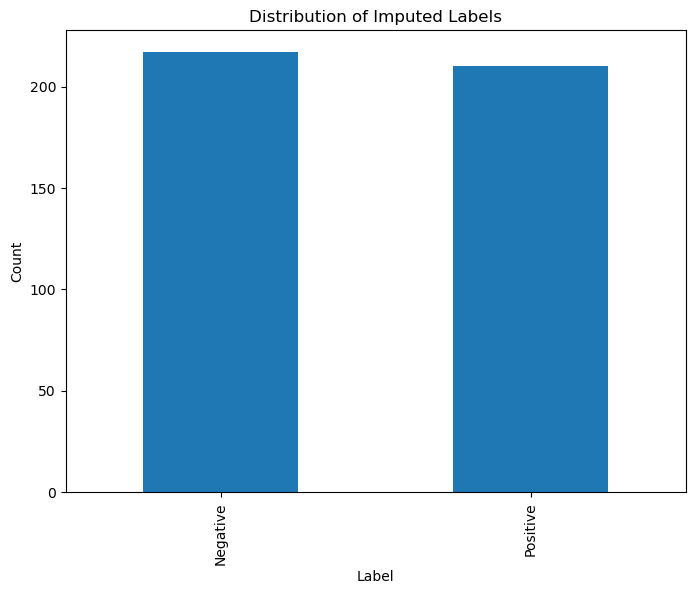


Example Reviews with Imputed Labels:
Review: luckily people got starship trooper people knew supposed silly could miss beginning see interactive ...
Imputed Label: Positive
Original Label: pos

Review: magnolia left relling theatre staggering relentless assault adventurous director reveling craft near...
Imputed Label: Positive
Original Label: pos

Review: steve martin one funniest men alive take true statement disappointment film equal mine martin hilari...
Imputed Label: Positive
Original Label: neg

Review: film critic moral unwritten law ethical movie critic would follow naturally want go film preconceive...
Imputed Label: Positive
Original Label: pos

Review: back february monthly los angeles comic book science fiction convention new line cinema put lavish p...
Imputed Label: Negative
Original Label: neg


Step 7: Compare Imputed Labels with Original Labels
Accuracy of imputed labels: 0.79

Classification Report for Imputed Labels:
              precision    recall  f1-score   su

In [33]:
# Plot distribution of imputed labels
plt.figure(figsize=(8, 6))
df.loc[~labeled_mask, 'Imputed_Label'].value_counts().plot(kind='bar')
plt.title('Distribution of Imputed Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Print some example reviews with their imputed labels
print("\nExample Reviews with Imputed Labels:")
for _, row in df[~labeled_mask].sample(5).iterrows():
    print(f"Review: {row['Processed_Review'][:100]}...")
    print(f"Imputed Label: {'Positive' if row['Imputed_Label'] == 1 else 'Negative'}")
    print(f"Original Label: {row['Label']}")
    print()

## Compare Imputed Labels with Original Labels

print("\nStep 7: Compare Imputed Labels with Original Labels")

# For the artificially missing labels, compare imputed with original
comparison_mask = ~labeled_mask
original_labels = df.loc[comparison_mask, 'Label'].map({'pos': 1, 'neg': 0})
imputed_labels = df.loc[comparison_mask, 'Imputed_Label']

imputation_accuracy = accuracy_score(original_labels, imputed_labels)
print(f"Accuracy of imputed labels: {imputation_accuracy:.2f}")

print("\nClassification Report for Imputed Labels:")
print(classification_report(original_labels, imputed_labels, target_names=['Negative', 'Positive']))

### How to use generative LLMs to build a label?

In this section of the tutorial, we're going to replicate Törnberg (2024b): [How to use Large Language Models for Text Analysis](https://arxiv.org/abs/2307.13106) by breaking the task into processes.

What is the paper doing?

This paper introduces the *WHAT* and *HOW* on using LLMs for text analysis, specifically focusing on the use of chat completion for text annotation. It offers an example of using the OpenAI API and model gpt-4 to annotate the level of populism in political speeches. Note that this is a creative and customized measurement that can be generated based on theorecial knowledge, traditionally done by human annotators. In the example below, we will be reproducing the paper with a more updated model using the `LangChain` package.

Before we start, there are some important concepts to understand about APIs:

An Application Programming Interface (API) is like a waiter at a restaurant - it acts as an intermediary that takes requests and returns responses. APIs allow different software systems to communicate without needing to understand each other's internal workings.

Key concepts of APIs:

- They provide a standardized way to request services or data
- They define the methods and data formats for interaction
- They handle authentication and access control
- They often have usage limits and pricing tiers

This API-based approach allows researchers and developers to leverage powerful LLM capabilities without needing to host or maintain the models themselves. For an example, see the [OpenAI API Reference](https://platform.openai.com/docs/api-reference/introduction), [playground](https://platform.openai.com/playground), and [pricing](https://openai.com/api/pricing/) page. Of course, with the lastest development of smaller, open-sourced models, hosting your own model has become an option as well (actually, a preferable option). Check out the [Huggingface](https://huggingface.co) libraries for examples. 

We'll proceed with replicating the paper in the below sections.

In [34]:
# install packages in your environment:
# pip install langchain openai pandas scikit-learn python-dotenv

from dotenv import load_dotenv,find_dotenv
from langchain_openai import ChatOpenAI
from langchain.schema import HumanMessage
import os

In [35]:
# Load environment variables (create a .env file with your OPENAI_API_KEY)
load_dotenv(find_dotenv())

# Initialize the LLM
llm = ChatOpenAI(model="gpt-4o", temperature=0.2)

# Test the LLM
messages = [HumanMessage(content="Explain LangChain briefly")]
response = llm.invoke(messages)
print(response.content)

LangChain is a framework designed to facilitate the development of applications powered by large language models (LLMs). It provides tools and abstractions that make it easier to build complex applications by leveraging the capabilities of LLMs. LangChain focuses on several key areas:

1. **Prompt Management**: It offers utilities for creating, managing, and optimizing prompts, which are crucial for interacting effectively with language models.

2. **Chaining**: LangChain allows developers to chain together multiple calls to language models or other computational steps, enabling the creation of more sophisticated workflows and applications.

3. **Integration**: The framework supports integration with external data sources and APIs, allowing applications to incorporate real-time data and perform actions based on model outputs.

4. **Memory**: LangChain includes mechanisms for maintaining state or memory across interactions, which is useful for applications that require context retention

Dataset we are using: Hawkins, Kirk A., Rosario Aguilar, Erin Jenne, Bojana Kocijan, Cristóbal Rovira Kaltwasser, Bruno Castanho Silva. 2019. Global Populism Database: Populism Dataset for Leaders 1.0. [link](https://populism.byu.edu/data/2019%20-%20global%20populism%20database%20(guardian%20version))

The political texts are in different languages, and possibly follows different text encoding standards. We define a function on auto encoding below. Note that this is also a common step we see when working with different datasets.

#### Preparing texts

In [36]:
import chardet # for auto encoding

def read_file_with_auto_encoding(file_path):
    # First, detect the encoding
    with open(file_path, 'rb') as file:
        raw_data = file.read()
        result = chardet.detect(raw_data)
        encoding = result['encoding']
    
    try:
        with open(file_path, 'r', encoding=encoding) as file:
            text = file.read()
            # Remove BOM if present
            if text.startswith('\ufeff'):
                text = text[1:]
                
            # Find the actual speech content
            lines = text.split('\n')
            content_start = 0
            
            # First try: Look for quotation marks
            for i, line in enumerate(lines):
                if '"' in line or '"' in line:
                    content_start = i
                    break
            
            # Second try: Look for first substantial text after metadata
            if content_start == 0:
                empty_lines = 0
                for i, line in enumerate(lines):
                    if not line.strip():
                        empty_lines += 1
                    elif empty_lines >= 2:  # After finding 2+ empty lines, next non-empty is content
                        content_start = i
                        break
            
            # Third try: Look for first empty line (simpler fallback)
            if content_start == 0:
                for i, line in enumerate(lines):
                    if line.strip() == '' and i > 0:
                        content_start = i + 1
                        break
            
            # Get the content
            content = '\n'.join(lines[content_start:])
            
            # Clean up any leading/trailing whitespace
            content = content.strip()
            
            return content
            
    except UnicodeDecodeError:
        # Fallback to latin-1 if detection fails
        with open(file_path, 'r', encoding='latin-1') as file:
            text = file.read()
            if text.startswith('\ufeff'):
                text = text[1:]
            return text.strip()
    except Exception as e:
        print(f"Error reading file {file_path}: {str(e)}")
        return ""

In [37]:
# Path to the folder containing speech text files
folder_path = 'data/global-populism-dataset-zi/speeches_20220427/speeches_20220427'
# Initialize an empty list to store speech data
data = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            text = read_file_with_auto_encoding(file_path)
            speech_name = os.path.splitext(filename)[0]
            data.append({'speech_name': speech_name, 'text': text})
        except Exception as e:
            print(f"Failed to read file {filename}: {str(e)}")
            continue

# Create a DataFrame with the collected data
df = pd.DataFrame(data)
print("\nFirst few rows:")
print(df.head())


First few rows:
                              speech_name  \
0               Nicaragua_Ortega_Famous_1   
1                  France_Chirac_Famous_1   
2                   Serbia_Tadic_Famous_1   
3  Georgia_Margvelashvili_International_1   
4                       UK_Blair_Ribbon_3   

                                                text  
0  Primer Año del Gobierno del Pueblo\nPrimer Ani...  
1  "Déclaration aux Français de Monsieur Jacques ...  
2  Држава Србија је забринута што је изостала реа...  
3                                                     
4  A Cabinet Minister is sitting having a pub lun...  


In [38]:
# Print a sample of text from each row to verify encoding
print("\nSample of first 100 characters from each text:")
for idx, row in df.head().iterrows():
    print(f"\n{row['speech_name']}:")
    print(row['text'][:100])


Sample of first 100 characters from each text:

Nicaragua_Ortega_Famous_1:
Primer Año del Gobierno del Pueblo
Primer Aniversario del Gobierno de 
Reconciliación y Unidad Nacio

France_Chirac_Famous_1:
"Déclaration aux Français de Monsieur Jacques CHIRAC, Président de la République.

Palais de l'Elysé

Serbia_Tadic_Famous_1:
Држава Србија је забринута што је изостала реакција Уједињениих нација, УНМИК-а, поводом проглашења 

Georgia_Margvelashvili_International_1:


UK_Blair_Ribbon_3:
A Cabinet Minister is sitting having a pub lunch when a member of the public accosts him.  “I’ve bee


With older models, we have to split the text into shorter-length pieces to fit the context window of the models. This became less of an issue with the model advancements. But let's check again in later steps. 

#### Prompts

Writing the prompt is a crucial step in using LLMs. The prompt is the input to the LLM, and it is the only way to control the output of the LLM. In this step, we will be writing the prompt for the chat completion task. This process is often iterative, relying on the output of the LLM to refine the prompt. The iterative nature of the prompting process gives it the name **prompt engineering**.

In [43]:
from langchain.prompts import ChatPromptTemplate
from langchain.schema import SystemMessage, HumanMessage
# Define the base prompt template
system_prompt = """You are an expert in analyzing political speeches for populist content. 
You can analyze text in any language."""

human_prompt = """Your task is to evaluate the level of populism in this political text:

{text}

A populist text must contain BOTH of these elements:

1. People-centrism:
- Focus on "the people" or "ordinary people" as an indivisible/homogeneous community
- Promotes politics as the popular will of "the people"
- NOTE: Appeals to specific subgroups (ethnicities, regional groups, classes) are NOT populist

2. Anti-elitism:
- Focus on "the elite" with negative descriptions
- Presents elite vs people as a moral struggle between good and bad
- NOTE: Criticism of specific elite members is NOT populist - must reject elite as a whole

Rate from 0-2:
0 = Not populist
1 = Somewhat populist
2 = Highly populist

Respond with: [score]; [brief justification]"""

# Create the chat prompt template
prompt_template = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", human_prompt),
])

#### Chains

What is a chain?

A chain is a sequence of steps that are executed in order. In the context of LangChain, a chain is a sequence of components or actions linked together to process inputs and produce desired outputs. For example, a chain might involve retrieving data, processing it through an LLM, and then formatting the output.

Let's first test the prompt with a single piece of text.

In [45]:
test_doc = df.iloc[0]['text']
test_doc

'Primer Año del Gobierno del Pueblo\nPrimer Aniversario del Gobierno de \nReconciliación y Unidad Nacional, \nGobierno del Poder Ciudadano \nPlaza de la Revolución\n\n10 de enero del 2007 \n\n\n“Quiero, ante ustedes, citar nuevamente al Papa Benedicto XVI. Juan Pablo decía: capitalismo salvaje, los pueblos no pueden esperar. Benedicto XVI ha dicho que: “el drama y escándalo del hambre exigen transformar el modelo de desarrollo global. Hace falta eliminar las causas estructurales ligadas al sistema de gobierno de la economía mundial, que destina la mayor parte de los recursos del Planeta a una minoría de la población.\n\nPara incidir a gran escala, es necesario transformar el modelo de desarrollo global. Lo que repercute ahora no sólo es el escándalo del hambre, sino también las emergencias ambientales y energéticas.”\n\n“Nuestra disposición, nuestra decisión con el Programa de Unida, Nicaragua Triunfa, esa Gran Alianza que conformamos de cara a las elecciones del año 2006, nos comprome

In [46]:
from langchain import LLMChain
from langchain.schema.output_parser import StrOutputParser  

# Create the chain
chain = prompt_template | llm | StrOutputParser()

# Test prompt with single text
try:
    # Use the chain we created earlier
    response = chain.invoke({"text": test_doc})
    
    print("Input text preview:")
    print(test_doc[:300], "...\n")
    
    print("LLM Response:")
    score, justification = response.split(';', 1)
    print(f"Score: {score.strip()}")
    print(f"Justification: {justification.strip()}")
    
except Exception as e:
    print(f"Error processing text: {str(e)}")

Input text preview:
Primer Año del Gobierno del Pueblo
Primer Aniversario del Gobierno de 
Reconciliación y Unidad Nacional, 
Gobierno del Poder Ciudadano 
Plaza de la Revolución

10 de enero del 2007 


“Quiero, ante ustedes, citar nuevamente al Papa Benedicto XVI. Juan Pablo decía: capitalismo salvaje, los pueblos no ...

LLM Response:
Score: 2
Justification: The text is highly populist as it strongly emphasizes people-centrism by repeatedly referring to "the people" and "ordinary people" as a unified and homogeneous community. It promotes the idea of politics as the expression of the popular will, with frequent mentions of the "Poder Ciudadano" (Citizen Power) and the empowerment of the people. Additionally, the text exhibits strong anti-elitism by criticizing the "capitalismo salvaje" (savage capitalism) and the global economic system that benefits a minority at the expense of the majority. It frames the struggle as a moral battle between the good, represented by the people, and th

Now we apply it to all the speeches in the dataframe if we are satisfied with the prompt.

In [47]:
import time
# Create the chain
chain = prompt_template | llm | StrOutputParser()

# Process all rows in the dataframe
def process_document(row):
    """Process a single document and return results"""
    try:
        response = chain.invoke({"text": row['text']})
        
        if ';' in response:
            score_part, justification = response.split(';', 1)
            score = float(score_part.replace('Score:', '').strip())
            
            return {
                'speech_name': row['speech_name'],
                'populism_score': round(score, 2),
                'justification': justification.strip()
            }
    except Exception as e:
        print(f"Error processing {row['speech_name']}: {e}")
        return None

# Process all valid documents
valid_df = df[df['text'].notna() & (df['text'] != '')]
results = []

for index, row in valid_df.iterrows():
    result = process_document(row)
    if result:
        results.append(result)
    time.sleep(1)

results_df = pd.DataFrame(results)

Error processing Honduras_Flores_International_1: Error code: 429 - {'error': {'message': 'Request too large for gpt-4o in organization org-jECHNImbZHknjPFTi0at60c8 on tokens per min (TPM): Limit 30000, Requested 31860. The input or output tokens must be reduced in order to run successfully. Visit https://platform.openai.com/account/rate-limits to learn more.', 'type': 'tokens', 'param': None, 'code': 'rate_limit_exceeded'}}
Error processing Ecuador_Correa_International_2: could not convert string to float: 'To accurately evaluate the level of populism in the text provided, I would need to analyze the content of the speech or text by Rafael Correa Delgado. However, since only the title and the name of the speaker are provided without any specific content, I cannot assess the presence of people-centrism or anti-elitism elements.\n\nTherefore, based on the lack of content to analyze:\n\n0'
Error processing Kazakhstan_Nazarbayev_Famous_1: Error code: 429 - {'error': {'message': 'Request t

Create a final result dataframe. 

In [48]:
# Create final results dataframe
results_df = pd.DataFrame(results)

# Display summary
print(f"Processed {len(results_df)} speeches")
print("\nFirst few results:")
print(results_df.head())

Processed 1028 speeches

First few results:
                        speech_name  populism_score  \
0         Nicaragua_Ortega_Famous_1             2.0   
1            France_Chirac_Famous_1             0.0   
2             Serbia_Tadic_Famous_1             0.0   
3                 UK_Blair_Ribbon_3             0.0   
4  Malaysia_Mohamad_International_1             1.0   

                                       justification  
0  The text is highly populist as it strongly emp...  
1  The speech by Jacques Chirac does not exhibit ...  
2  The text does not exhibit populist characteris...  
3  The text does not exhibit populist characteris...  
4  The speech by Prime Minister Tun Dr Mahathir M...  


In [49]:
# Save to CSV
results_df.to_csv('data/populism_analysis_results_Sep2025.csv', index=False)

#### Validation

According to Törnberg (2024b): 

"The Krippendorff’s alpha gives a measure of interrater agreement, and is used to assess the extent to which multiple raters or coders agree when coding or categorizing qualitative data. Krippendorff’s alpha takes into account both the observed agreement among raters and the expected agreement by chance. It can be applied to different types of nominal, ordinal, or interval-level data."

Hypothetically, if we have the 'ground truth' data provided by human annotators, we are able to use the Krippendorff's alpha for reliability check (illustration purpose only in the example below). Python's `kripendorff` package provides convenient syntax on obtaining this metrics across ratings.

Another common metric researchers usually adopt is Cohen's kappa. Note that Cohen's Kappa is used to measure agreements between two raters on categorical data, whereas Krippendorff's Alpha is a general reliability coefficient that can handle two or more raters and multiple levels of measurement and missing data. 

#### Further thoughts on Model Selection

Cova and Schmitz (2024) recommend two studies on LLM model selection:

Törnberg's six principles for model selection:

- Reproducibility
- Ethnic & legality
- Transparency
- Culture and Language
- Scalability
- Complexity

The teacher-student model proposed by Weber and Reichardt (2024):

<figure>
  <img src="https://github.com/jyang32/TAD_workshop/raw/main/plot/image.png" alt="Model Selection" width="500"/>
  <figcaption>
    <small>Source: Weber and Reichardt (2023).</small>
  </figcaption>
</figure>

---

## References

- **Books**:
  - *Text as Data A New Framework for Machine Learning and the Social Sciences* by Grimmer, Robert, and Stewart, 2022. 
  - *Practical Natural Language Processing* by Vijjala, Majumder, and Gupta, 2020

- **Workshop**:
  - Joshua Cova and Luuk Schmitz. Large Language Models (LLMs) in Social Science Research Session I: Introduction. 2024. Max Planck Institute for the Study of Societies.

- **Recent Papers**:
  - Modeling Human Behavior Computationally
	- Aher, Gati, Rosa I. Arriaga, and Adam Tauman Kalai. (2022). Using Large Language Models to Simulate Multiple Humans and Replicate Human Subject Studies. [arXiv](https://doi.org/10.48550/ARXIV.2208.10264).
	-	Argyle, Lisa P., Ethan C. Busby, Nancy Fulda, Joshua R. Gubler, Christopher Rytting, and David Wingate. (2023). Out of One, Many: Using Language Models to Simulate Human Samples. Political Analysis, 31(3), 337–51. [link](https://doi.org/10.1017/pan.2023.2).
	-	Dillion, Danica, Niket Tandon, Yuling Gu, and Kurt Gray. (2023). Can AI Language Models Replace Human Participants? Trends in Cognitive Sciences, 27(7), 597–600. [link](https://doi.org/10.1016/j.tics.2023.04.008).
    -	Jiang, Ferrara. (2023). Social-LLM: Modeling User Behavior at Scale using Language Models and Social Network Data. [arXiv](https://arxiv.org/abs/2401.00893?utm_source=chatgpt.com)
	  - Tjuatja, Lindia, Valerie Chen, Sherry Tongshuang Wu, Ameet Talwalkar, and Graham Neubig.“Do LLMs Exhibit Human-Like Response Biases? A Case Study in Survey Design.” [arXiv](https://doi.org/10.48550/ARXIV.2311.04076)

  - Simulating Social Relationships
	  -	Akata, Elif, Lion Schulz, Julian Coda-Forno, Seong Joon Oh, Matthias Bethge, and Eric Schulz. (2023). Playing Repeated Games with Large Language Models. [arXiv](https://doi.org/10.48550/ARXIV.2305.16867).
	  -	Park, Joon Sung, Joseph C. O’Brien, Carrie J. Cai, Meredith Ringel Morris, Percy Liang, and Michael S. Bernstein. (2023). Generative Agents: Interactive Simulacra of Human Behavior. [arXiv](https://arxiv.org/abs/2304.03442).
	  -	Wang, Lei, Chen Ma, Xueyang Zeng, Zeyu Zhang, Hao Yang, Jingsen Zhang, Zhiyuan Chen, et al. (2024). A Survey on Large Language Model Based Autonomous Agents. Frontiers of Computer Science, 16(8), 186345. [link](https://doi.org/10.1007/s11704-024-40231-1).

  - Interacting with Human Agents
	  -	Chopra, Felix, and Ingar Haaland. (2023). Conducting Qualitative Interviews with AI. SSRN Electronic Journal. [link](https://doi.org/10.2139/ssrn.4583756).


  - Text Annotation
	  -	Gilardi, Fabrizio, Meysam Alizadeh, and Maël Kubli. (2023). ChatGPT Outperforms Crowd Workers for Text-Annotation Tasks. Proceedings of the National Academy of Sciences, 120(30), e2305016120. [link](https://doi.org/10.1073/pnas.2305016120).	
	  -	Laurer, Moritz. (2024). Synthetic Data: Save Money, Time and Carbon with Open Source. Hugging Face Blog. [link](https://huggingface.co/blog/synthetic-data-save-costs).
	  -	Leek, Lauren Caroline, Simon Bischl, and Maximilian Freier. (2024). Introducing Textual Measures of Central Bank Policy-Linkages Using ChatGPT. [link](https://doi.org/10.31235/osf.io/78wnp).
	  -	Törnberg, Petter. (2023). ChatGPT-4 Outperforms Experts and Crowd Workers in Annotating Political Twitter Messages with Zero-Shot Learning. [arXiv](https://doi.org/10.48550/ARXIV.2304.06588).
	  - Törnberg, Petter.(2024a). Best Practices for Text Annotation with Large Language Models. Sociologica, 18(2).[link](https://sociologica.unibo.it/article/view/19461/18663)
      - Törnberg, Petter. (2024b). How to Use Large-Language Models for Text Analysis. 1 Oliver’s Yard, 55 City Road, London  EC1Y 1SP  United Kingdom: SAGE Publications Ltd.


  - Steamlining Research Pipeline
	  -	Korinek. (2023). Generative AI for Economic Research: Use Cases and Implications for Economists. Journal of Economic Literature, 61(4), 1281-1317. [link](https://www.aeaweb.org/articles?id=10.1257/jel.20231736)


  - Model Selection
      -   Weber, Maximilian, and Merle Reichardt. 2023. “Evaluation Is All You Need. Prompting Generative Large Language Models for Annotation Tasks in the Social Sciences. A Primer Using Open Models.”

